## Q1.Identify and handle any missing values in the dataset.

In [2]:
import pandas as pd
df = pd.read_csv("cricket_data.csv")

In [4]:
df['Highest_Score'] = df['Highest_Score'].astype(str).str.replace('*', '', regex=False)
df['Best_Bowling_Match'] = df['Best_Bowling_Match'].astype(str).str.replace('*', '', regex=False)

numeric_columns = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
    'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Year                    42
Matches_Batted          41
Not_Outs                41
Runs_Scored             41
Highest_Score           41
Batting_Average         41
Balls_Faced             41
Batting_Strike_Rate     41
Centuries               41
Half_Centuries          41
Fours                   41
Sixes                   41
Catches_Taken           41
Stumpings               41
Matches_Bowled          42
Balls_Bowled            42
Runs_Conceded           42
Wickets_Taken           42
Best_Bowling_Match     753
Bowling_Average         42
Economy_Rate            42
Bowling_Strike_Rate     42
Four_Wicket_Hauls       42
Five_Wicket_Hauls       42
dtype: int64


In [6]:
df['Year'].fillna(df['Year'].median(), inplace=True) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9416\2805457118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].median(), inplace=True)  #handling missing values


## Q2 Are there any inconsistencies in the dataset (e.g., mismatched data types, outliers)?

In [9]:
print("Original Data Types:\n", df.dtypes)

print("Sample Cleaned Highest Score Values:\n", df['Highest_Score'].unique()[:10])

Original Data Types:
 Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object
Sample Cleaned Highest Score Values:
 [ 46.  92.  99. 101.  72.  87.   0.  32.  50.  18.]


## Q3 Convert all numerical columns to appropriate data types for analysis.

In [12]:
numeric_columns = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average',
    'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
    'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded',
    'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate',
    'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Converted Data Types:\n", df.dtypes)

Converted Data Types:
 Year                   float64
Player_Name             object
Matches_Batted         float64
Not_Outs               float64
Runs_Scored            float64
Highest_Score          float64
Batting_Average        float64
Balls_Faced            float64
Batting_Strike_Rate    float64
Centuries              float64
Half_Centuries         float64
Fours                  float64
Sixes                  float64
Catches_Taken          float64
Stumpings              float64
Matches_Bowled         float64
Balls_Bowled           float64
Runs_Conceded          float64
Wickets_Taken          float64
Best_Bowling_Match     float64
Bowling_Average        float64
Economy_Rate           float64
Bowling_Strike_Rate    float64
Four_Wicket_Hauls      float64
Five_Wicket_Hauls      float64
dtype: object


## Q4 Normalize or standardize relevant numerical features for better comparison.


In [15]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = df.copy()

normalize_cols = [
    'Runs_Scored', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate',
    'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate'
]

scaler = MinMaxScaler()
df_normalized[normalize_cols] = scaler.fit_transform(df[normalize_cols])

print("Normalized Sample:\n", df_normalized[normalize_cols].head())

Normalized Sample:
    Runs_Scored  Batting_Average  Balls_Faced  Batting_Strike_Rate  \
0     0.062693         0.301980     0.079688             0.299025   
1     0.606372         0.417228     0.625000             0.368750   
2     0.378212         0.260297     0.454688             0.316150   
3     0.652621         0.449010     0.728125             0.340650   
4     0.209661         0.504950     0.264063             0.301775   

   Bowling_Average  Economy_Rate  Bowling_Strike_Rate  
0              0.0           0.0                  0.0  
1              0.0           0.0                  0.0  
2              0.0           0.0                  0.0  
3              0.0           0.0                  0.0  
4              0.0           0.0                  0.0  


## Q5. How would you handle data if there are duplicate records?


In [18]:
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

df = df.drop_duplicates()

Total Duplicate Rows: 0


## Exploratory Data Analysis (EDA)

## Q6 What is the distribution of the Batting Average for all players?

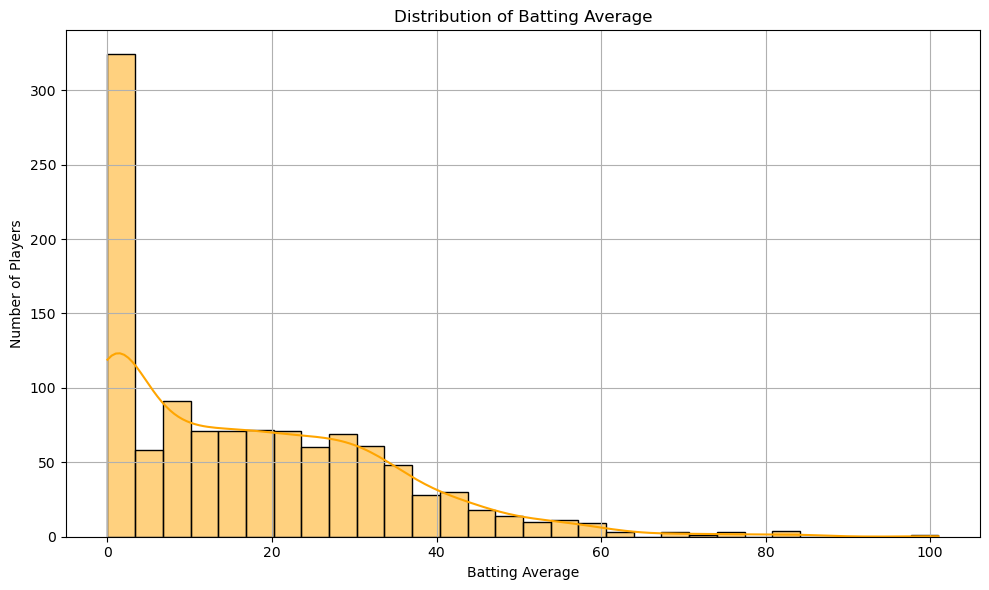

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Batting_Average'].dropna(), bins=30, kde=True, color='orange')
plt.title('Distribution of Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Number of Players')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q7 Which player has the highest Batting Strike Rate across all seasons?

In [29]:
top_strike = df[df['Batting_Strike_Rate'].notnull()]
top_strike_player = top_strike.loc[top_strike['Batting_Strike_Rate'].idxmax(), ['Player_Name', 'Batting_Strike_Rate']]

print("Player with Highest Batting Strike Rate:")
print(top_strike_player)

Player with Highest Batting Strike Rate:
Player_Name            Prerak Mankad
Batting_Strike_Rate            400.0
Name: 541, dtype: object


## Q8. What is the trend in Runs Scored for each player over different years?

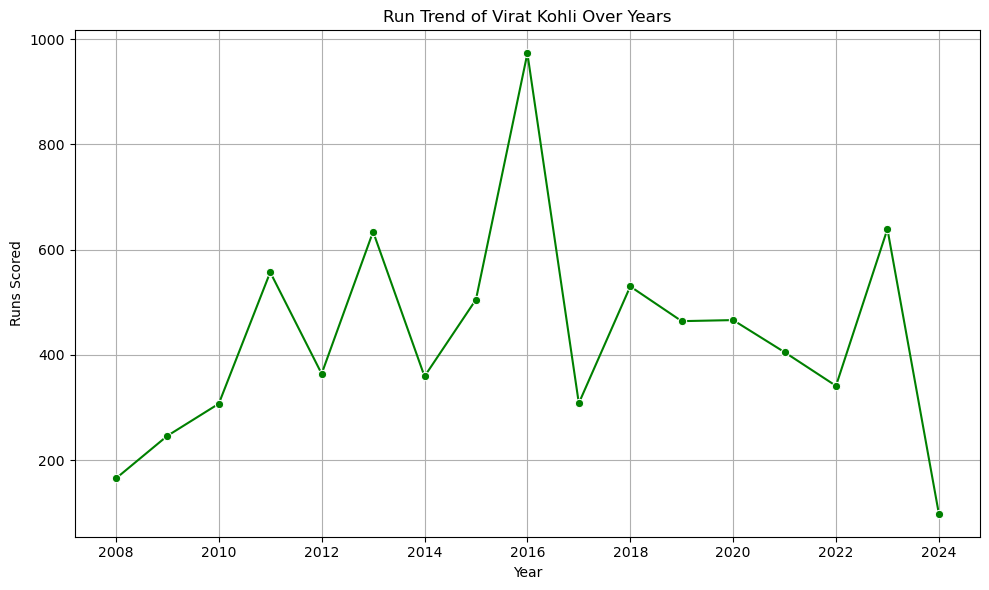

In [45]:
player_trend = df[df['Player_Name'] == 'Virat Kohli']
plt.figure(figsize=(10, 6))
sns.lineplot(data=player_trend, x='Year', y='Runs_Scored', marker='o', color='green')
plt.title('Run Trend of Virat Kohli Over Years')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q9 Identify the top 3 players with the most Centuries

In [43]:
top_centuries = df.groupby('Player_Name')['Centuries'].sum().sort_values(ascending=False).head(3)
print("Top 3 Players with Most Centuries:\n", top_centuries)

Top 3 Players with Most Centuries:
 Player_Name
Virat Kohli     7.0
Jos Buttler     5.0
David Warner    4.0
Name: Centuries, dtype: float64


## Q10Which player has the highest Bowling Economy Rate?

In [47]:
worst_economy = df[df['Economy_Rate'].notnull()]
worst_player = worst_economy.loc[worst_economy['Economy_Rate'].idxmax(), ['Player_Name', 'Economy_Rate']]

print("Player with Highest Economy Rate:\n", worst_player)

Player with Highest Economy Rate:
 Player_Name     Yashasvi Jaiswal
Economy_Rate                36.0
Name: 831, dtype: object


## Feature Engineering

## Q11 Create a new feature called "Boundary Percentage", which calculates the
## percentage of runs scored from fours and sixes.


In [49]:
df['Boundary_Percentage'] = ((4 * df['Fours'] + 6 * df['Sixes']) / df['Runs_Scored']) * 100
df['Boundary_Percentage'] = df['Boundary_Percentage'].fillna(0)

print(df[['Player_Name', 'Fours', 'Sixes', 'Runs_Scored', 'Boundary_Percentage']].head())

       Player_Name  Fours  Sixes  Runs_Scored  Boundary_Percentage
0  Ruturaj Gaikwad    8.0    1.0         61.0            62.295082
1  Ruturaj Gaikwad   46.0   30.0        590.0            61.694915
2  Ruturaj Gaikwad   33.0   14.0        368.0            58.695652
3  Ruturaj Gaikwad   64.0   23.0        635.0            62.047244
4  Ruturaj Gaikwad   16.0    6.0        204.0            49.019608


## Q12 Create a feature called "Batting Impact Score" based on runs, strike rate, and
## average.

In [52]:
df['Batting_Impact_Score'] = (
    df['Runs_Scored'] * 0.5 +
    df['Batting_Strike_Rate'] * 0.3 +
    df['Batting_Average'] * 0.2
)

print(df[['Player_Name', 'Batting_Impact_Score']].sort_values(by='Batting_Impact_Score', ascending=False).head())

        Player_Name  Batting_Impact_Score
946     Virat Kohli               548.325
223    Shubman Gill               504.206
816     Jos Buttler               487.721
131    David Warner               481.540
924  Faf du Plessis               422.334


## Q13 Generate a metric to evaluate a player's all-round performance considering both
# batting and bowling stats.

In [55]:
df['All_Round_Score'] = (
    df['Batting_Impact_Score'] +
    (df['Wickets_Taken'] * 20) -
    (df['Bowling_Average'].fillna(0) * 2)
)

print(df[['Player_Name', 'All_Round_Score']].sort_values(by='All_Round_Score', ascending=False).head())

        Player_Name  All_Round_Score
793   Harshal Patel          682.248
341     Rashid Khan          635.621
776   Kagiso Rabada          628.564
656  Jasprit Bumrah          562.578
946     Virat Kohli          548.325


## Q14Categorize players into Aggressive, Balanced, and Defensive based on their strike rate.

In [58]:
def classify_type(sr):
    if pd.isnull(sr):
        return 'Unknown'
    elif sr > 140:
        return 'Aggressive'
    elif sr >= 100:
        return 'Balanced'
    else:
        return 'Defensive'

df['Player_Type'] = df['Batting_Strike_Rate'].apply(classify_type)

print(df['Player_Type'].value_counts())

Player_Type
Balanced      462
Defensive     391
Aggressive    278
Unknown        41
Name: count, dtype: int64


## Q15 Compute the year-over-year growth in performance metrics for each player

In [61]:
df_sorted = df.sort_values(by=['Player_Name', 'Year'])

df_sorted['Run_Growth_%'] = df_sorted.groupby('Player_Name')['Runs_Scored'].pct_change() * 100

print(df_sorted[['Player_Name', 'Year', 'Runs_Scored', 'Run_Growth_%']].head(10))

          Player_Name    Year  Runs_Scored  Run_Growth_%
1050      Abdul Samad  2020.0        111.0           NaN
1049      Abdul Samad  2021.0        111.0      0.000000
1048      Abdul Samad  2022.0          4.0    -96.396396
1047      Abdul Samad  2023.0        169.0   4125.000000
1046      Abdul Samad  2024.0         15.0    -91.124260
273   Abhinav Manohar  2022.0        108.0           NaN
272   Abhinav Manohar  2023.0        114.0      5.555556
1096  Abhishek Sharma  2018.0         63.0           NaN
1095  Abhishek Sharma  2019.0          9.0    -85.714286
1094  Abhishek Sharma  2020.0         71.0    688.888889


C:\Users\Admin\AppData\Local\Temp\ipykernel_9416\4246425591.py:4: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_sorted['Run_Growth_%'] = df_sorted.groupby('Player_Name')['Runs_Scored'].pct_change() * 100


## Visualization and Insights

## Q16. Create a bar chart to show the Runs Scored vs. Balls Faced for all players.

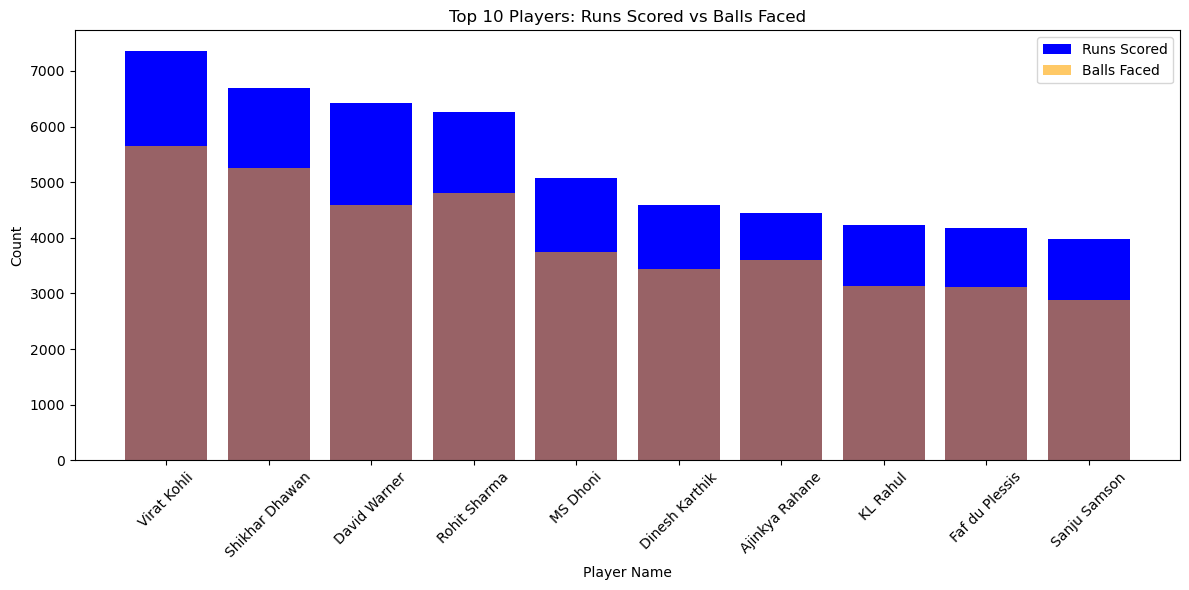

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

top_players = df.groupby('Player_Name')[['Runs_Scored', 'Balls_Faced']].sum().reset_index()

top10 = top_players.sort_values(by='Runs_Scored', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top10['Player_Name'], top10['Runs_Scored'], label='Runs Scored', color='blue')
plt.bar(top10['Player_Name'], top10['Balls_Faced'], label='Balls Faced', color='orange', alpha=0.6)

plt.title('Top 10 Players: Runs Scored vs Balls Faced')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Q17Generate a heatmap showing the correlation between different numerical features.

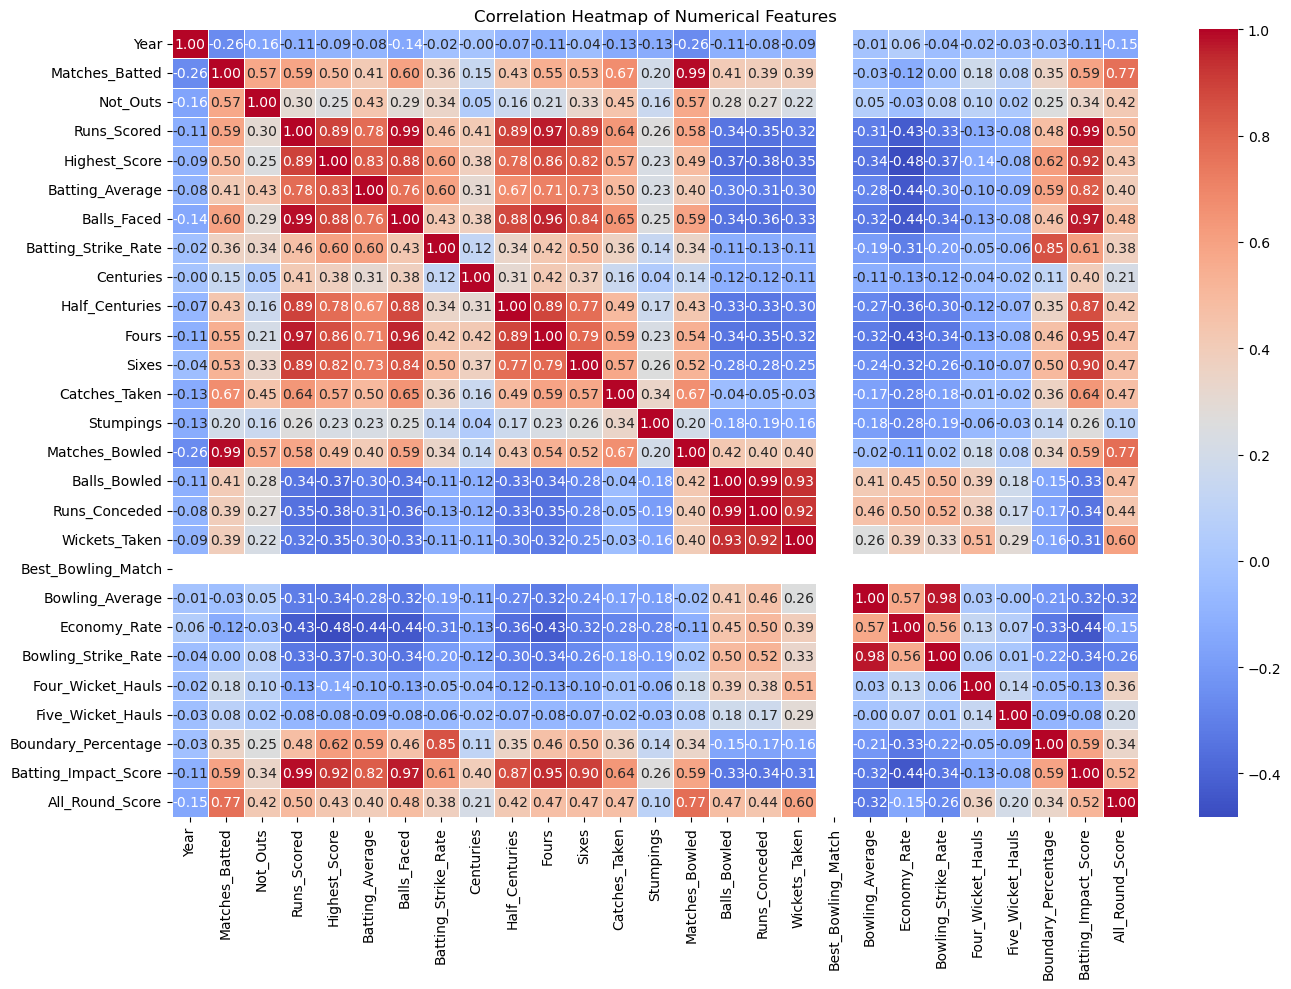

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Q18  Plot a trend line showing the performance of a single player over multiple years.

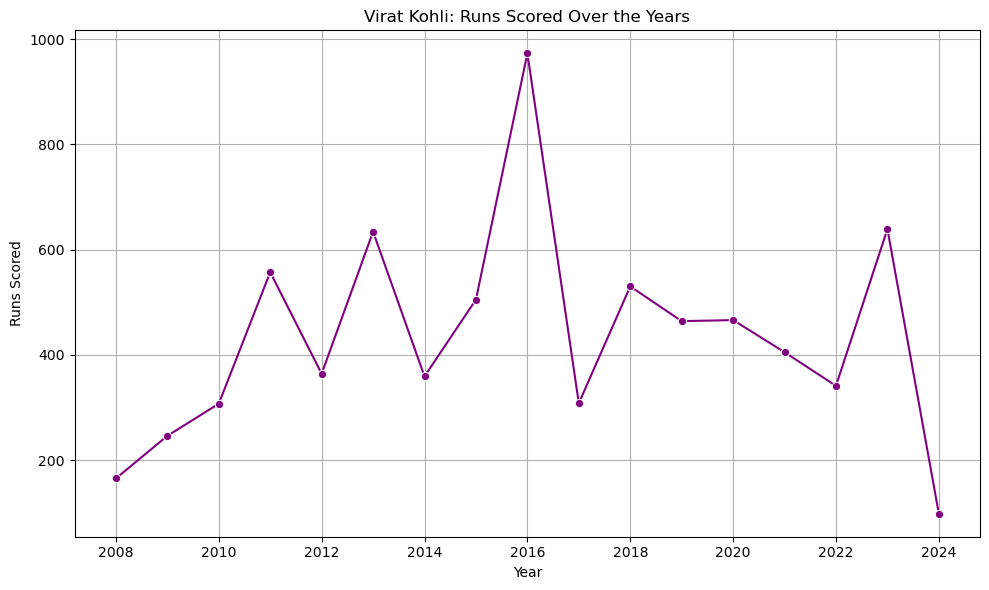

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

kohli = df[df['Player_Name'] == 'Virat Kohli'].sort_values(by='Year')

plt.figure(figsize=(10, 6))
sns.lineplot(data=kohli, x='Year', y='Runs_Scored', marker='o', color='purple')
plt.title('Virat Kohli: Runs Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q19 Create a pie chart for the distribution of centuries and half-centuries across all players.

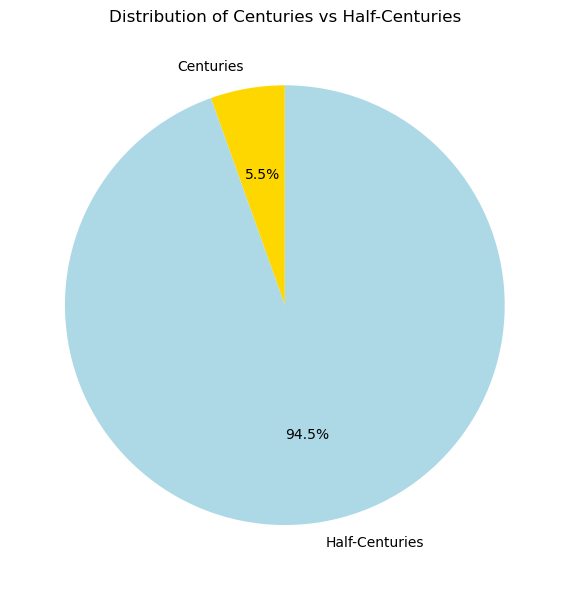

In [74]:
import matplotlib.pyplot as plt

total_centuries = df['Centuries'].sum()
total_half_centuries = df['Half_Centuries'].sum()

plt.figure(figsize=(6, 6))
plt.pie([total_centuries, total_half_centuries],
        labels=['Centuries', 'Half-Centuries'],
        autopct='%1.1f%%',
        colors=['gold', 'lightblue'],
        startangle=90)
plt.title('Distribution of Centuries vs Half-Centuries')
plt.tight_layout()
plt.show()

## Q20 Develop a visualization to compare Bowling Average vs. Bowling Strike Rate.

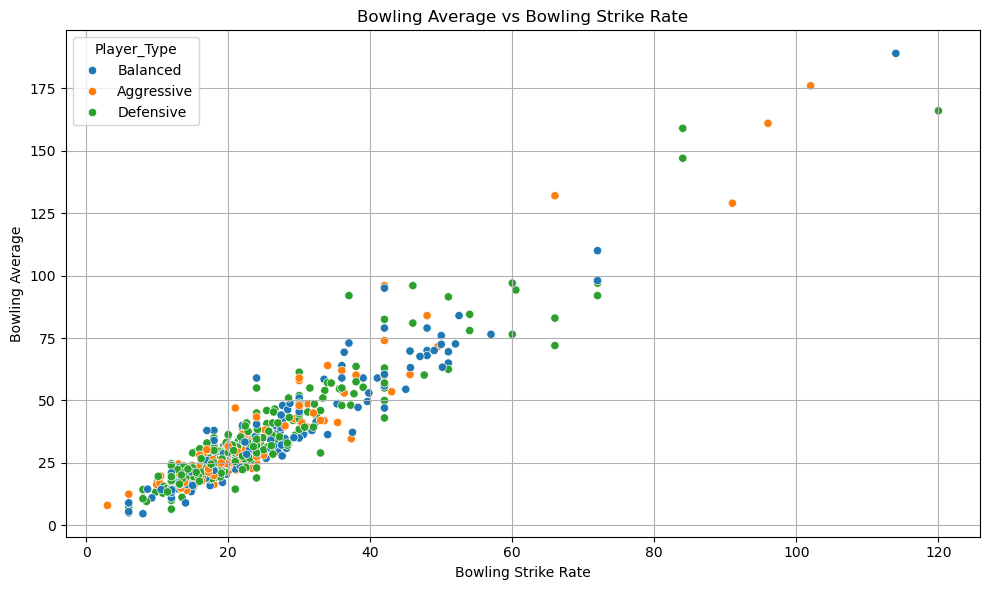

In [79]:
bowlers = df[(df['Bowling_Average'] > 0) & (df['Bowling_Strike_Rate'] > 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=bowlers, x='Bowling_Strike_Rate', y='Bowling_Average', hue='Player_Type')
plt.title('Bowling Average vs Bowling Strike Rate')
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Bowling Average')
plt.grid(True)
plt.tight_layout()
plt.show()

## PYTHON BASED QUERIES

## Q21Write a Python query to get the top 5 players with the highest Batting Average

In [83]:
top_avg = df[df['Batting_Average'].notnull()] \
            .groupby('Player_Name', as_index=False)['Batting_Average'].max() \
            .sort_values(by='Batting_Average', ascending=False).head(5)

print("Top 5 Players with Highest Batting Average:")
print(top_avg)

Top 5 Players with Highest Batting Average:
       Player_Name  Batting_Average
36    Deepak Hooda           101.00
85   Manish Pandey            84.00
82        MS Dhoni            83.20
183     Tom Curran            83.00
194    Virat Kohli            81.08


## Q22Write a Python query to find out which player has played the most matches.

In [86]:
df['Total_Matches'] = df['Matches_Batted'].fillna(0) + df['Matches_Bowled'].fillna(0)

most_matches = df.groupby('Player_Name', as_index=False)['Total_Matches'].sum() \
                 .sort_values(by='Total_Matches', ascending=False).head(1)

print("Player Who Played the Most Matches:")
print(most_matches)

Player Who Played the Most Matches:
   Player_Name  Total_Matches
98    MS Dhoni          504.0


## Q23. Retrieve all players who have scored more than 500 runs in a season.

In [91]:
high_scorers = df[df['Runs_Scored'] > 500][['Player_Name', 'Year', 'Runs_Scored']] \
                .sort_values(by='Runs_Scored', ascending=False)

print("Players who scored more than 500 runs in a season:")
print(high_scorers)

Players who scored more than 500 runs in a season:
          Player_Name    Year  Runs_Scored
946       Virat Kohli  2016.0        973.0
223      Shubman Gill  2023.0        890.0
816       Jos Buttler  2022.0        863.0
131      David Warner  2016.0        848.0
268   Kane Williamson  2018.0        735.0
924    Faf du Plessis  2023.0        730.0
129      David Warner  2019.0        692.0
121      Rishabh Pant  2018.0        684.0
5        Devon Conway  2023.0        672.0
471          KL Rahul  2020.0        670.0
473          KL Rahul  2018.0        659.0
130      David Warner  2017.0        641.0
939       Virat Kohli  2023.0        639.0
3     Ruturaj Gaikwad  2021.0        635.0
949       Virat Kohli  2013.0        634.0
926    Faf du Plessis  2021.0        633.0
470          KL Rahul  2021.0        626.0
830  Yashasvi Jaiswal  2023.0        625.0
698    Shikhar Dhawan  2020.0        618.0
469          KL Rahul  2022.0        616.0
600  Suryakumar Yadav  2023.0        605.0
472

## Q24. Identify players who have taken at least one five-wicket haul.

In [94]:
five_wicket = df[df['Five_Wicket_Hauls'] >= 1][['Player_Name', 'Year', 'Five_Wicket_Hauls']]

print("Players with 5-wicket hauls:")
print(five_wicket)

Players with 5-wicket hauls:
              Player_Name    Year  Five_Wicket_Hauls
55        Ravindra Jadeja  2012.0                1.0
208         Ishant Sharma  2011.0                1.0
350          Mohit Sharma  2023.0                1.0
416         Andre Russell  2021.0                1.0
452          Sunil Narine  2012.0                1.0
459   Varun Chakaravarthy  2020.0                1.0
575           Amit Mishra  2008.0                1.0
654        Jasprit Bumrah  2022.0                1.0
682         Akash Madhwal  2023.0                1.0
769        Arshdeep Singh  2021.0                1.0
793         Harshal Patel  2021.0                1.0
909      Yuzvendra Chahal  2022.0                1.0
920            Adam Zampa  2016.0                1.0
1021       Alzarri Joseph  2019.0                1.0
1110    Wanindu Hasaranga  2022.0                1.0
1127    Bhuvneshwar Kumar  2023.0                1.0
1133    Bhuvneshwar Kumar  2017.0                1.0
1148       Jaydev

## Q25. Write a query to calculate the total number of boundaries hit by each player.

In [97]:
df['Total_Boundaries'] = df['Fours'] + df['Sixes']

boundaries = df.groupby('Player_Name', as_index=False)['Total_Boundaries'].sum() \
               .sort_values(by='Total_Boundaries', ascending=False)

print("Total Boundaries Hit by Each Player:")
print(boundaries.head(10))  

Total Boundaries Hit by Each Player:
        Player_Name  Total_Boundaries
193  Shikhar Dhawan             908.0
233     Virat Kohli             891.0
41     David Warner             877.0
172    Rohit Sharma             819.0
50   Dinesh Karthik             588.0
98         MS Dhoni             588.0
8    Ajinkya Rahane             553.0
79         KL Rahul             529.0
53   Faf du Plessis             527.0
181    Sanju Samson             495.0
